In [1]:
import pandas as pd
df = pd.read_csv("marketing_campaign_cleaned.csv")
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
pd.isnull(df).sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [17]:
df['Income'].describe()


count    2.239000e+03
mean     3.173483e-18
std      1.000223e+00
min     -2.346716e+00
25%     -7.675483e-01
50%     -2.719133e-02
75%      7.621241e-01
max      5.159021e+00
Name: Income, dtype: float64

In [20]:
df['Income'].fillna(0)  # Since it's already standardized


0       0.288446
1      -0.262524
2       0.917946
3      -1.182738
4       0.295687
          ...   
2235    0.432565
2236    0.562950
2237    0.234396
2238    0.807322
2239    0.042299
Name: Income, Length: 2239, dtype: float64

In [21]:
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Dt_Customer_31-07-2012,Dt_Customer_31-07-2013,Dt_Customer_31-08-2012,Dt_Customer_31-08-2013,Dt_Customer_31-10-2012,Dt_Customer_31-12-2012,Dt_Customer_31-12-2013,IncomeBracket_Medium,IncomeBracket_High,IncomeBracket
0,-0.020472,-0.984922,0.288446,-0.824769,-0.930282,0.306624,0.983339,1.551126,1.679196,2.461517,...,False,False,False,False,False,False,False,True,False,Low
1,-1.052624,-1.235281,-0.262524,1.033035,0.906491,-0.384051,-0.870826,-0.636311,-0.713430,-0.650588,...,False,False,False,False,False,False,False,True,False,NaN
2,-0.446581,-0.317300,0.917946,-0.824769,-0.930282,-0.798456,0.362313,0.570551,-0.177305,1.344820,...,False,False,False,False,False,False,False,True,False,Low
3,0.182261,1.268304,-1.182738,1.033035,-0.930282,-0.798456,-0.870826,-0.560882,-0.651399,-0.504136,...,False,False,False,False,False,False,False,False,False,NaN
4,-0.082093,1.017946,0.295687,1.033035,-0.930282,1.549838,-0.389456,0.419693,-0.217182,0.154898,...,False,False,False,False,False,False,False,True,False,Low


In [ ]:
# Since Year_Birth is standardized, convert to real year
df['Age'] = 2025 - (df['Year_Birth'] * df['Year_Birth'].std() + df['Year_Birth'].mean())

# Total Spend
df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


In [23]:
selected_features = [
    'Income', 'Age', 'Recency', 'Kidhome', 'Teenhome',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds',
    'NumWebPurchases', 'NumStorePurchases', 'NumDealsPurchases',
    'Total_Spend', 'Response'
]

X = df[selected_features]


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


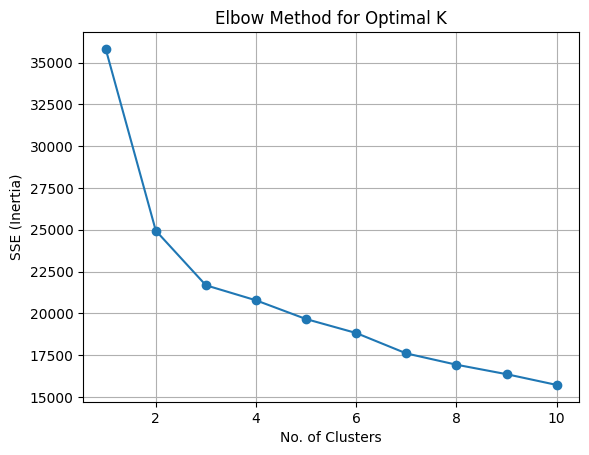

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('No. of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()
optimal_k = 4  # Based on the elbow method

In [26]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


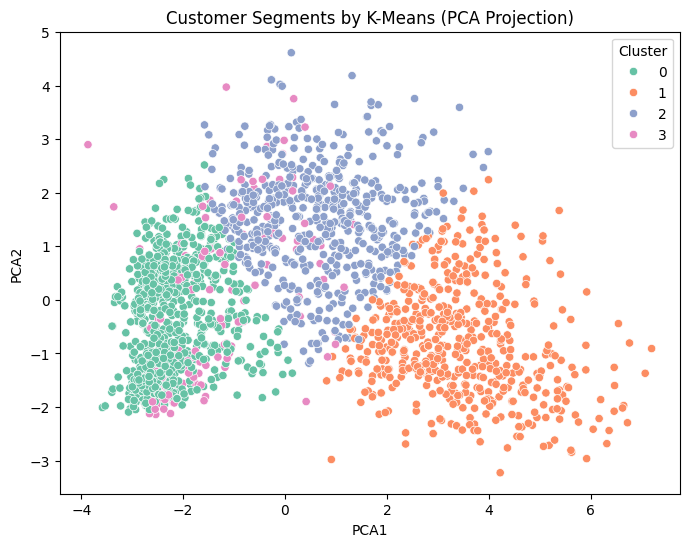

In [27]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segments by K-Means (PCA Projection)')
plt.show()


In [28]:
cluster_summary = df.groupby('Cluster')[selected_features].mean().round(2)
print(cluster_summary)


         Income      Age  Recency  Kidhome  Teenhome  MntWines  MntFruits  \
Cluster                                                                     
0         -0.77  2024.78     0.09     0.65     -0.08     -0.78      -0.54   
1          1.10  2025.00     0.01    -0.72     -0.61      0.89       1.14   
2          0.34  2025.41     0.02    -0.50      0.75      0.51      -0.12   
3         -0.71  2024.80    -0.71     0.60     -0.12     -0.48      -0.46   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0                  -0.64            -0.56             -0.54         -0.57   
1                   1.28             1.22              1.14          0.70   
2                  -0.10            -0.16             -0.12          0.28   
3                  -0.43            -0.51             -0.45         -0.18   

         NumWebPurchases  NumStorePurchases  NumDealsPurchases  Total_Spen

C:\Users\Aryan\AppData\Local\Temp\ipykernel_4876\2536766867.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Cluster', palette='Set2')


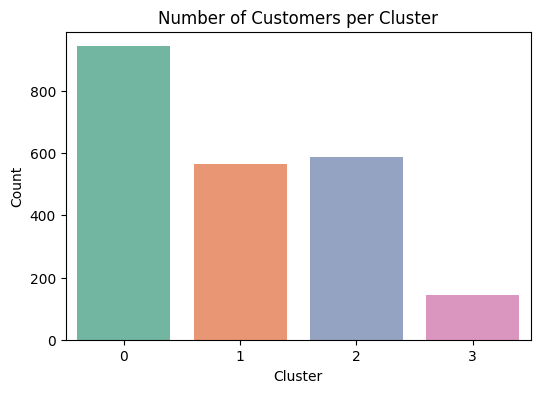

In [29]:
# visualizations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Cluster', palette='Set2')
plt.title("Number of Customers per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


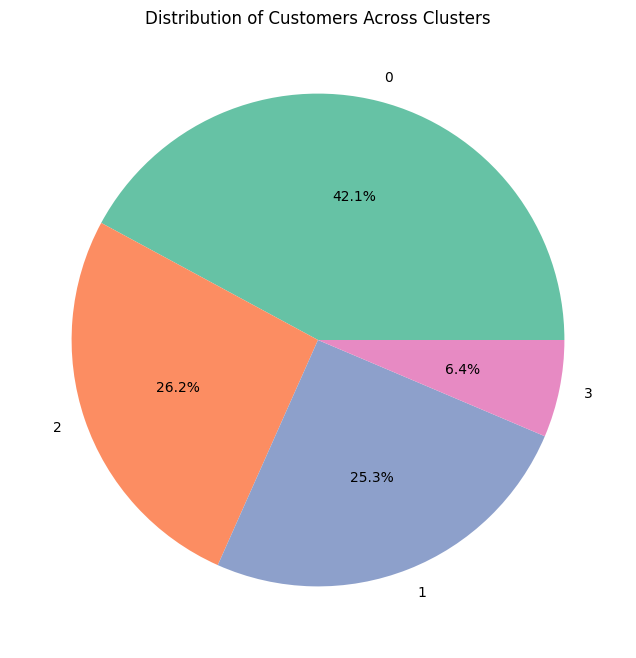

In [34]:
# Pie chart for cluster distribution
cluster_count = df['Cluster'].value_counts()
cluster_count.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=sns.color_palette("Set2", len(cluster_count)))
plt.title('Distribution of Customers Across Clusters')
plt.ylabel('')
plt.show()


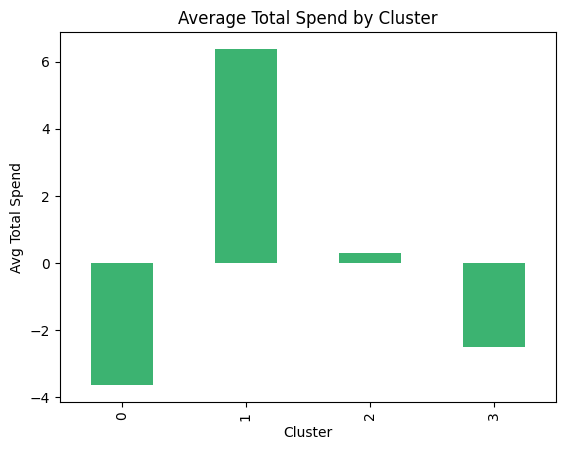

In [ ]:
#Comparing average Total_Spend across clusters.
df.groupby('Cluster')['Total_Spend'].mean().plot(kind='bar', color='mediumseagreen')
plt.title("Average Total Spend by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Avg Total Spend")
plt.show()


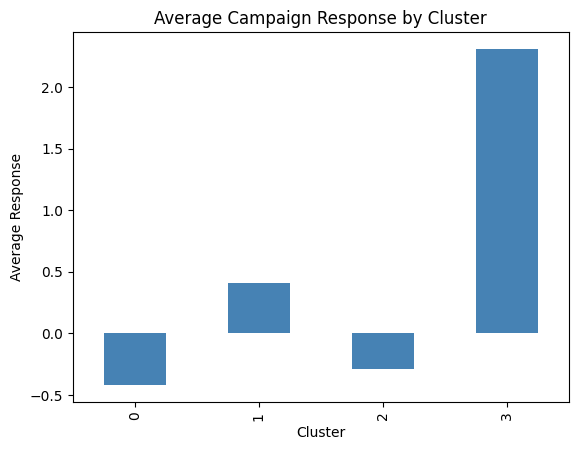

In [ ]:
# which cluster has the highest response rate
df.groupby('Cluster')['Response'].mean().plot(kind='bar', color='steelblue')
plt.title("Average Campaign Response by Cluster")
plt.ylabel("Average Response")
plt.xlabel("Cluster")
plt.show()


C:\Users\Aryan\AppData\Local\Temp\ipykernel_4876\2339156245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='MntWines', data=df, palette='Set3')


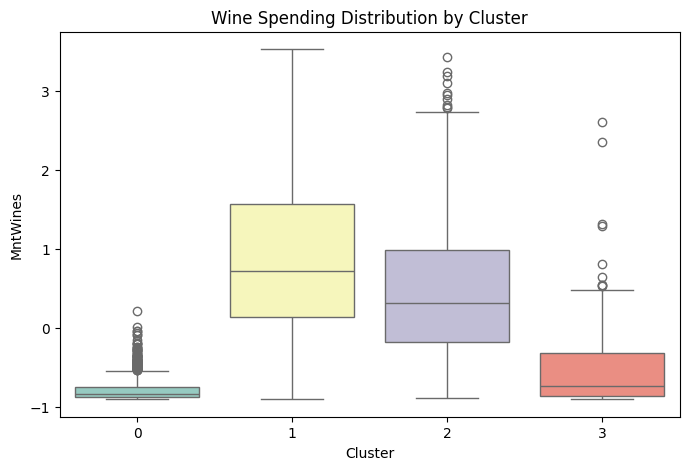

In [ ]:
#Spend Behavior by Cluster for Specific Product
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='MntWines', data=df, palette='Set3')
plt.title("Wine Spending Distribution by Cluster")
plt.show()
